<a href="https://colab.research.google.com/github/MeikoFudo/CoursePaper/blob/main/Sarima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec
import seaborn as sns
rcParams['figure.figsize'] = 11.7,8.27

In [3]:
import tensorflow as tf

if tf.test.is_gpu_available():
    print("GPU доступен!")
else:
    print("GPU недоступен")

with tf.device("/GPU:0"):
    pass


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU недоступен


In [4]:
import pandas as pd
import ssl


class CryptoData:
    def __init__(self, url: str):
        ssl._create_default_https_context = ssl._create_unverified_context
        self.df = pd.read_csv(url, delimiter=",", skiprows=[0])
    
    def get_dataframe(self) -> pd.DataFrame:
        return self.df

In [5]:
url = "https://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv"
crypto_data = CryptoData(url)
data = crypto_data.get_dataframe()

In [6]:
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,1683417600000,2023-05-07,BTCUSDT,28848.19,29138.29,28395.23,28430.10,30003.410280,8.658385e+08,855425
1,1683331200000,2023-05-06,BTCUSDT,29505.60,29820.00,28300.00,28848.20,49249.284590,1.429518e+09,1221021
2,1683244800000,2023-05-05,BTCUSDT,28838.16,29677.00,28800.00,29505.61,58415.830480,1.709787e+09,1288027
3,1683158400000,2023-05-04,BTCUSDT,29026.16,29379.83,28663.64,28838.16,42575.475010,1.233816e+09,961542
4,1683072000000,2023-05-03,BTCUSDT,28669.85,29266.66,28113.69,29026.16,64615.792130,1.845961e+09,1502909
...,...,...,...,...,...,...,...,...,...,...
2085,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
2086,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2087,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2088,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2090 entries, 0 to 2089
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unix         2090 non-null   int64  
 1   Date         2090 non-null   object 
 2   Symbol       2090 non-null   object 
 3   Open         2090 non-null   float64
 4   High         2090 non-null   float64
 5   Low          2090 non-null   float64
 6   Close        2090 non-null   float64
 7   Volume BTC   2090 non-null   float64
 8   Volume USDT  2090 non-null   float64
 9   tradecount   2090 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 163.4+ KB


In [8]:
data.describe()

,Unix,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
count,2.090000e+03,2090.000000,2090.000000,2090.000000,2090.000000,2090.000000,2.090000e+03,2.090000e+03
mean,1.593173e+12,19731.081019,20275.489598,19117.531646,19742.715182,77539.388265,1.683803e+09,1.487796e+06
std,5.214027e+10,16290.469974,16736.540841,15774.561666,16288.125969,88094.206328,2.148912e+09,2.094256e+06
min,1.502928e+12,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03
25%,1.548050e+12,7472.635000,7697.747500,7279.875000,7483.045000,31441.025154,2.587590e+08,2.714980e+05
50%,1.593173e+12,11234.895000,11561.000000,10865.030000,11253.745000,48736.559005,6.741199e+08,7.321220e+05
75%,1.638295e+12,29471.602500,30336.467500,28830.657500,29471.602500,82835.582841,2.485219e+09,1.629330e+06
max,1.683418e+12,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07


In [9]:
data= data.sort_values(by='Date')
data

,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
2089,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
2088,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2087,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
2086,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
2085,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...
4,1683072000000,2023-05-03,BTCUSDT,28669.85,29266.66,28113.69,29026.16,64615.792130,1.845961e+09,1502909
3,1683158400000,2023-05-04,BTCUSDT,29026.16,29379.83,28663.64,28838.16,42575.475010,1.233816e+09,961542
2,1683244800000,2023-05-05,BTCUSDT,28838.16,29677.00,28800.00,29505.61,58415.830480,1.709787e+09,1288027
1,1683331200000,2023-05-06,BTCUSDT,29505.60,29820.00,28300.00,28848.20,49249.284590,1.429518e+09,1221021


In [10]:
data.reset_index(inplace=True)
data

,index,Unix,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USDT,tradecount
0,2089,1502928000000,2017-08-17,BTCUSDT,4261.48,4485.39,4200.74,4285.08,795.150377,3.454770e+06,3427
1,2088,1503014400000,2017-08-18,BTCUSDT,4285.08,4371.52,3938.77,4108.37,1199.888264,5.086958e+06,5233
2,2087,1503100800000,2017-08-19,BTCUSDT,4108.37,4184.69,3850.00,4139.98,381.309763,1.549484e+06,2153
3,2086,1503187200000,2017-08-20,BTCUSDT,4120.98,4211.08,4032.62,4086.29,467.083022,1.930364e+06,2321
4,2085,1503273600000,2017-08-21,BTCUSDT,4069.13,4119.62,3911.79,4016.00,691.743060,2.797232e+06,3972
...,...,...,...,...,...,...,...,...,...,...,...
2085,4,1683072000000,2023-05-03,BTCUSDT,28669.85,29266.66,28113.69,29026.16,64615.792130,1.845961e+09,1502909
2086,3,1683158400000,2023-05-04,BTCUSDT,29026.16,29379.83,28663.64,28838.16,42575.475010,1.233816e+09,961542
2087,2,1683244800000,2023-05-05,BTCUSDT,28838.16,29677.00,28800.00,29505.61,58415.830480,1.709787e+09,1288027
2088,1,1683331200000,2023-05-06,BTCUSDT,29505.60,29820.00,28300.00,28848.20,49249.284590,1.429518e+09,1221021


In [11]:
data['Date'] = pd.to_datetime(data['Date'])
type(data.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
class BitcoinVisualizer:
    def __init__(self, df):
        self.df = df
        
    def plot_bitcoin_prices(self):
        sns.despine(left=True, bottom=True)
        sns.lineplot(x=data['Date'], y=data['Close'])
        plt.title('Bitcoin Price')
        plt.xlabel('Date')
        plt.grid(True)
        plt.ylabel('Price (USD)')
        plt.show()

    def plot_bitcoin_scatter(prices_df):
        sns.lineplot(x=data['Date'], y=data['Close'])
        plt.title('Bitcoin Price')
        plt.xlabel('Date')
        plt.ylabel('Price (USD)')
        plt.grid(True)
        plt.scatter(data['Date'], data['Close'])
        plt.xlabel('Date')
        plt.ylabel('Bitcoin Price')
        plt.title('Scatter plot of Bitcoin stock quotes')
        plt.show()

    def plot_bitcoin_distribution(self):
        sns.histplot(data['Close'], bins=20)
        sns.despine(left=True)
        plt.grid(True)
        plt.title('Distribution of Bitcoin Prices')
        plt.xlabel('Bitcoin Price')
        plt.ylabel('Count')
        plt.show()

    def plot_bitcoin_boxplot(self, nrows, ncols):
        plt.grid(True)
        data_new = self.df.drop(['Date', 'Volume BTC','Volume USDT', 'Symbol'], axis=1)
        fig = plt.figure(figsize=(24, 12))
        spec = GridSpec(ncols=ncols, nrows=nrows, figure=fig, top=1.3)
        my_id = 0
        for i in range(nrows):
            for j in range(ncols):
                if i == nrows-1:
                    ax = fig.add_subplot(spec[i, :])
                    sns.boxplot(data_new.iloc[:, my_id])
                    ax.set_title(data_new.columns[my_id])
                    break
                ax = fig.add_subplot(spec[i, j])
                sns.boxplot(data_new.iloc[:, my_id])
                ax.set_title(data_new.columns[my_id])
                my_id += 1
        plt.show()

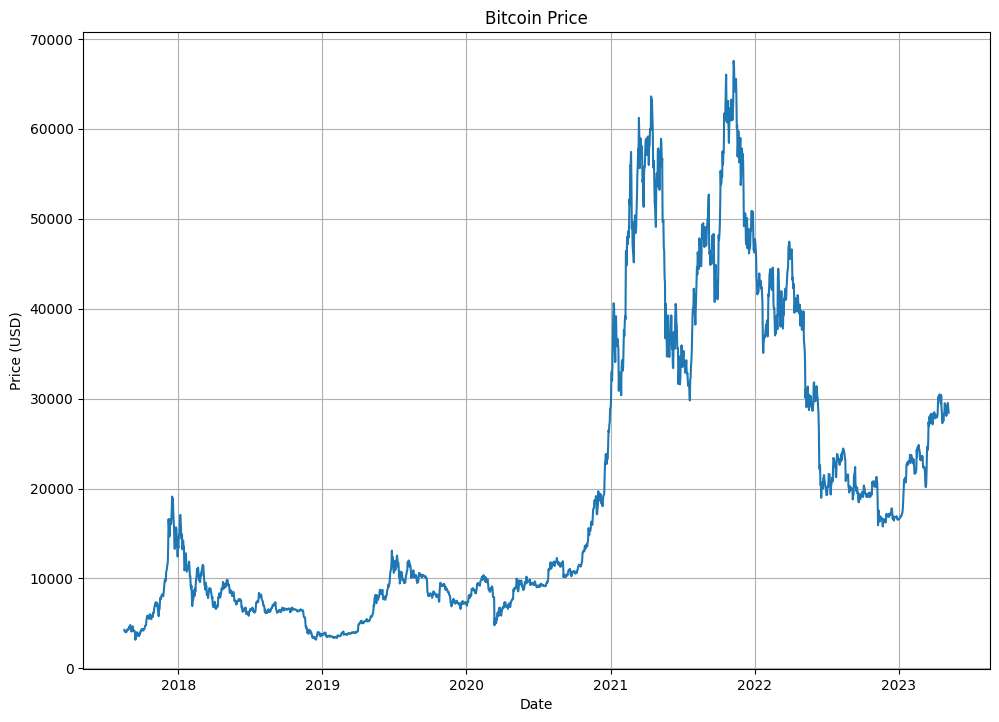

In [13]:
visualizer = BitcoinVisualizer(data)
visualizer.plot_bitcoin_prices()

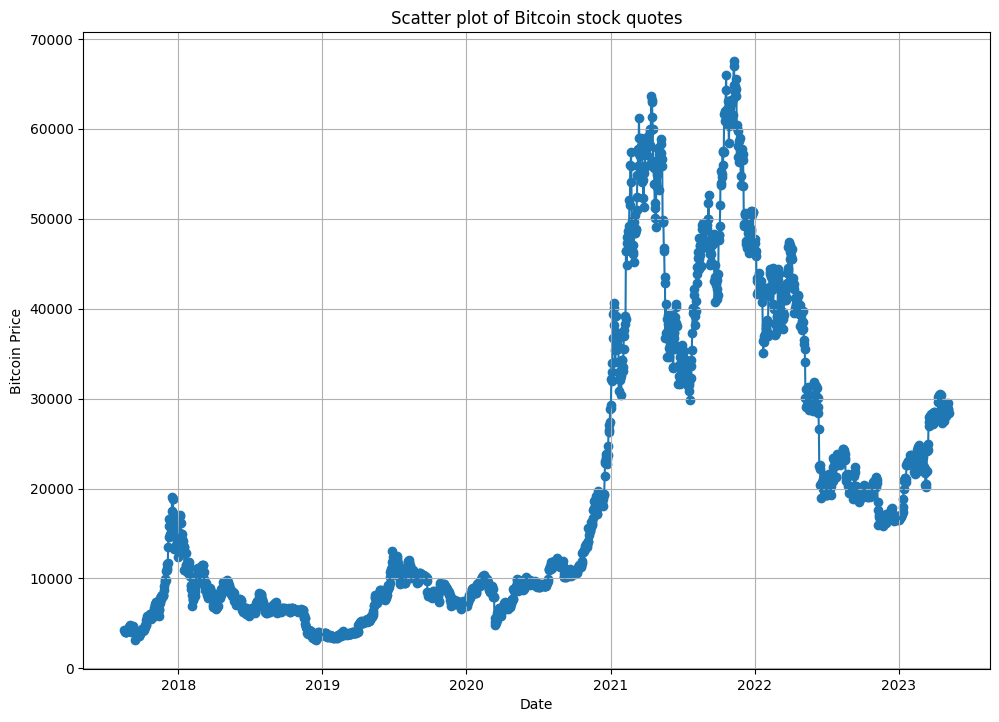

In [14]:
visualizer.plot_bitcoin_scatter()

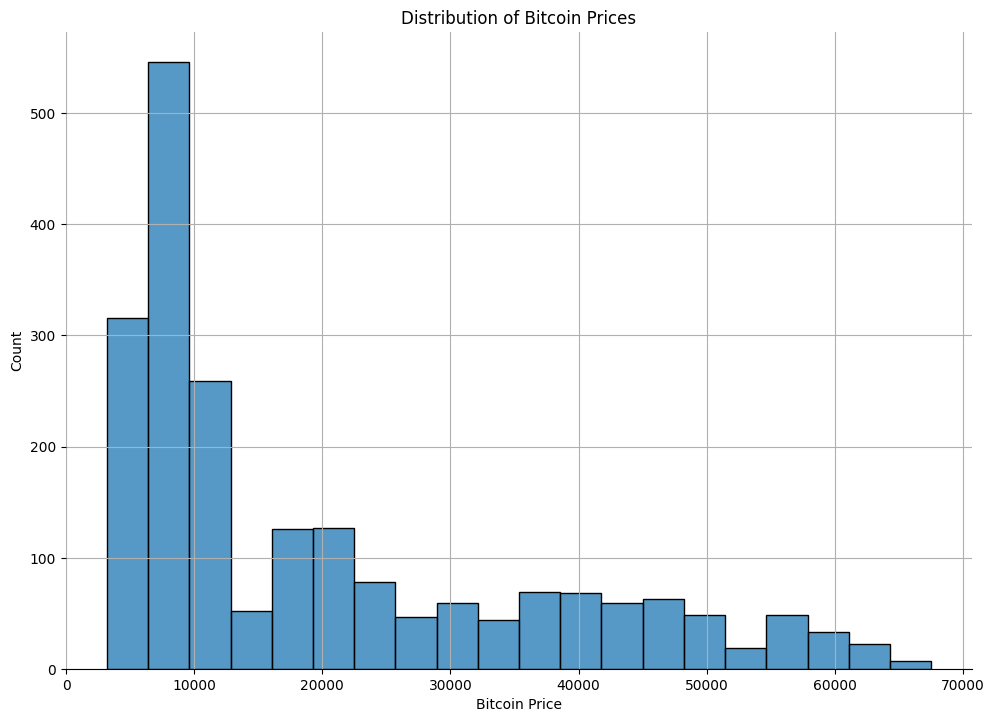

In [15]:
visualizer.plot_bitcoin_distribution()

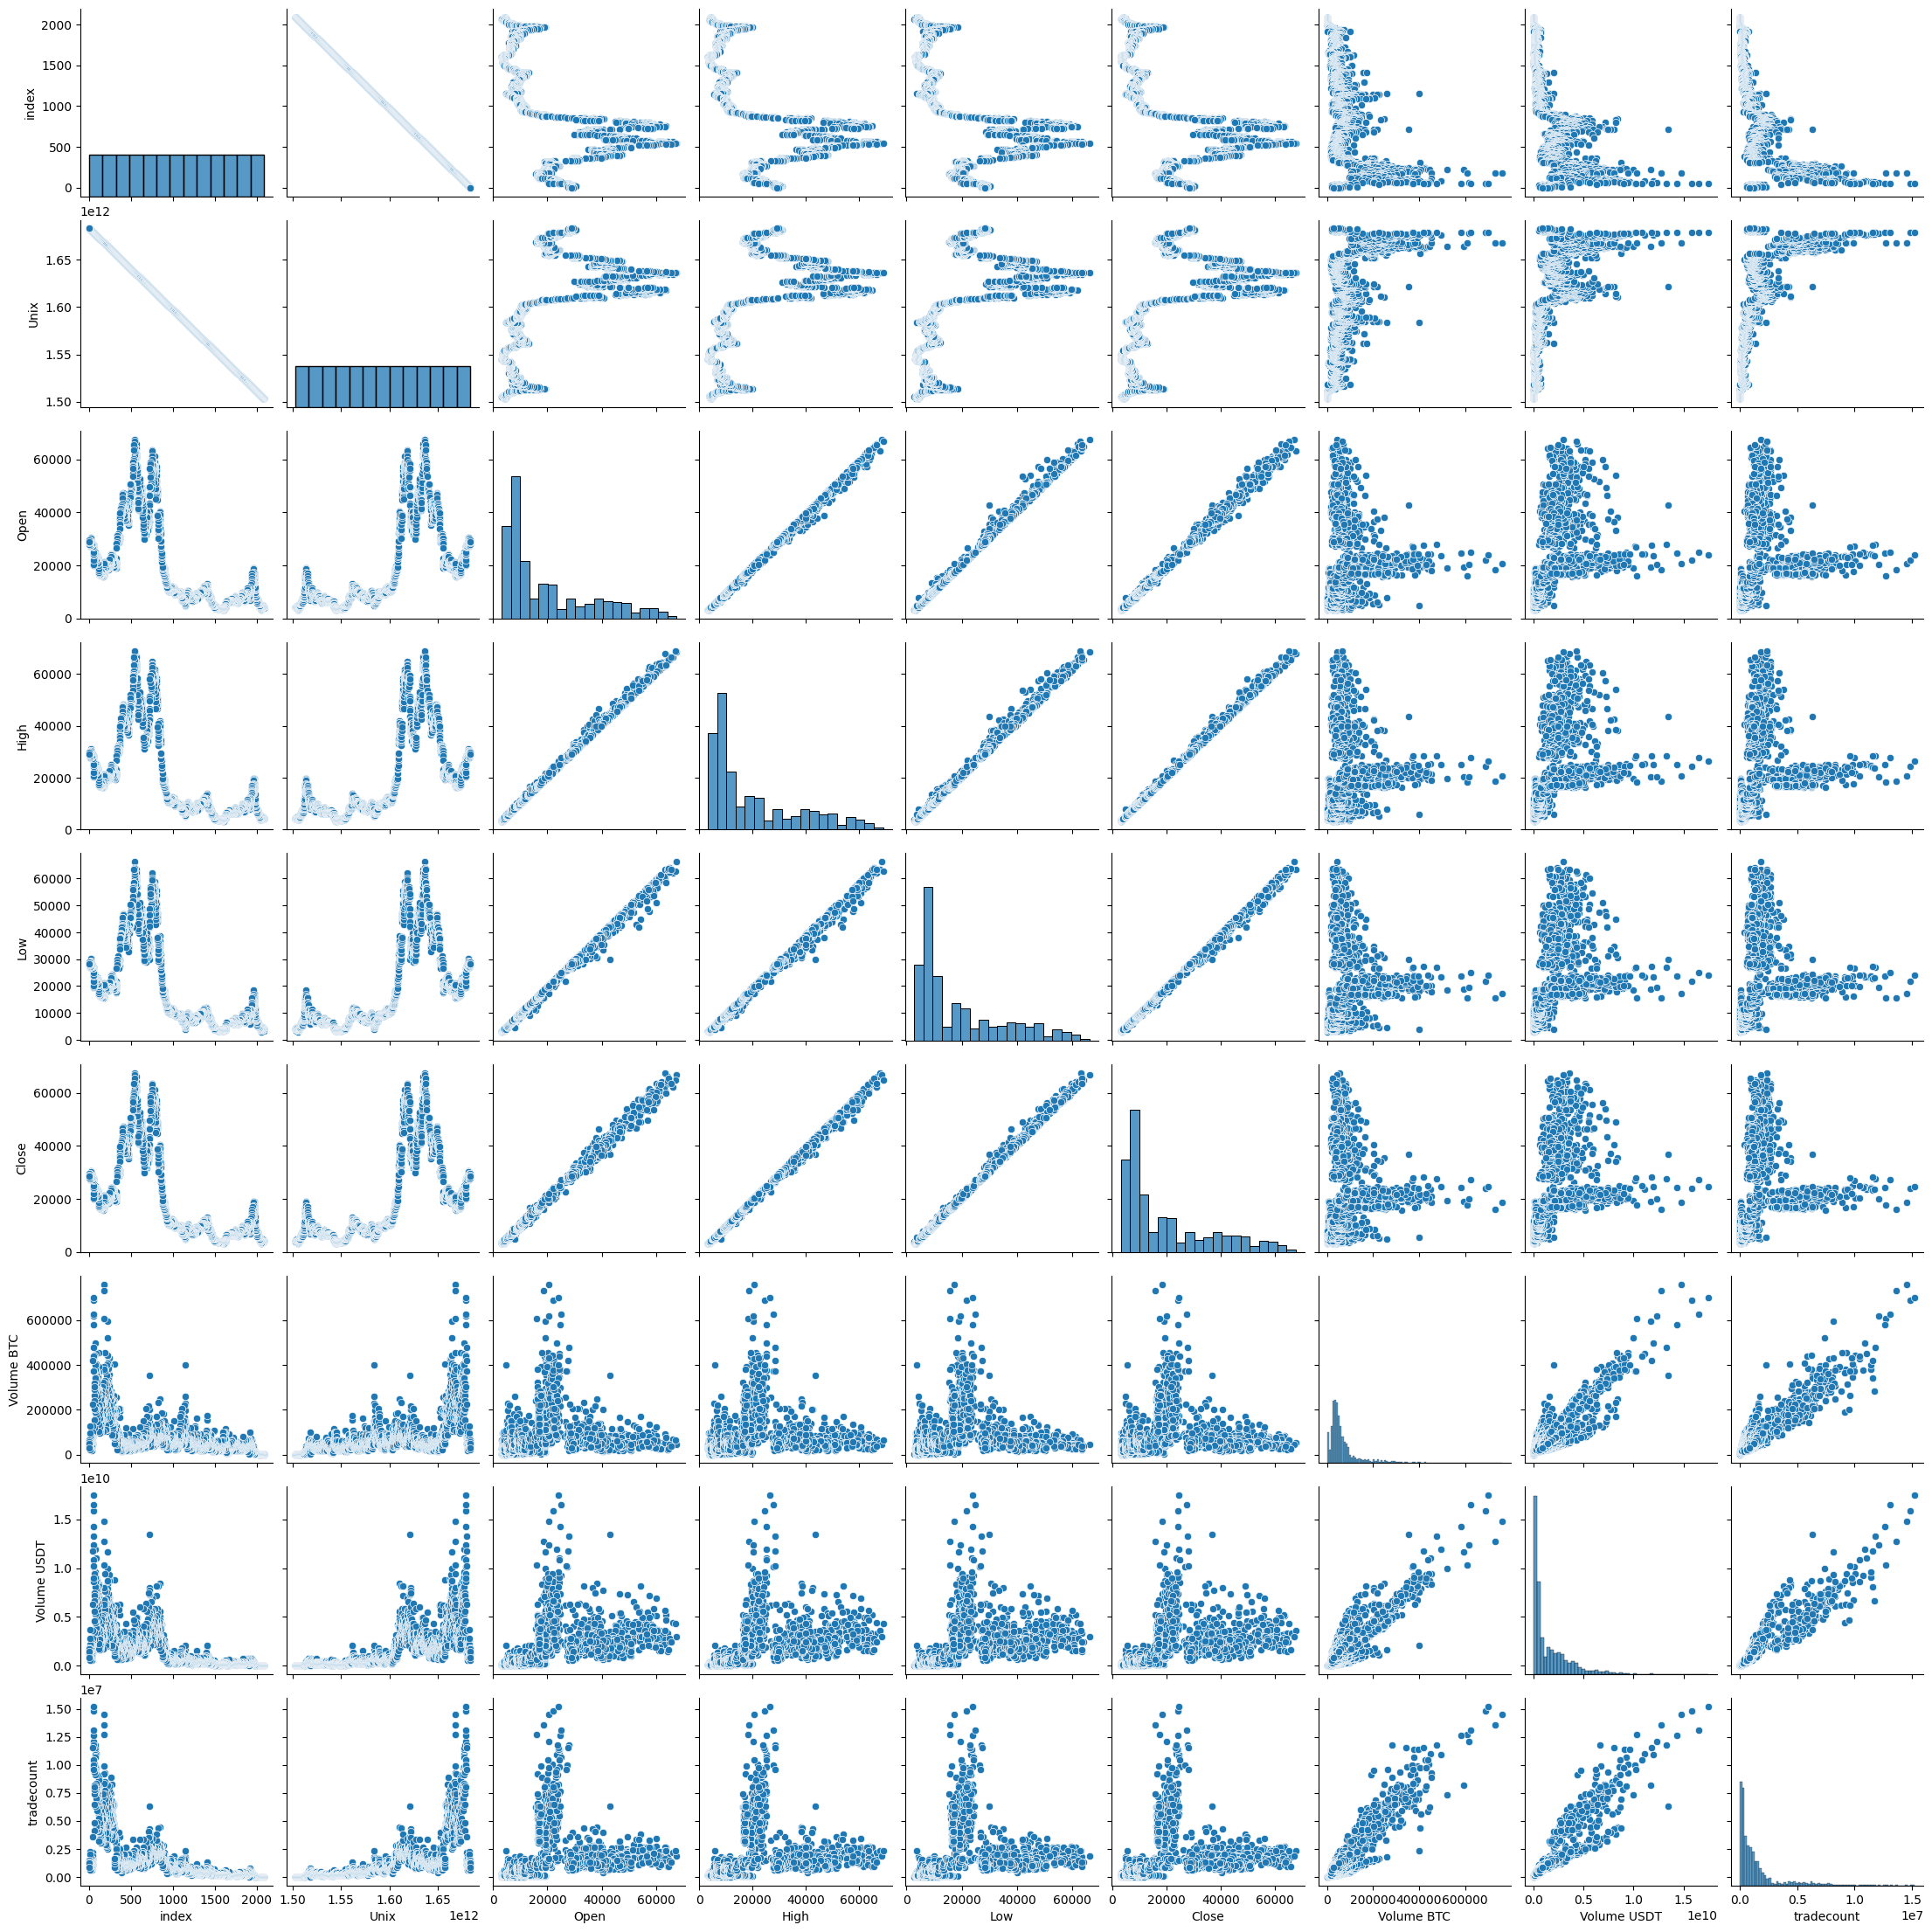

In [16]:
sns.pairplot(data)

plt.show()

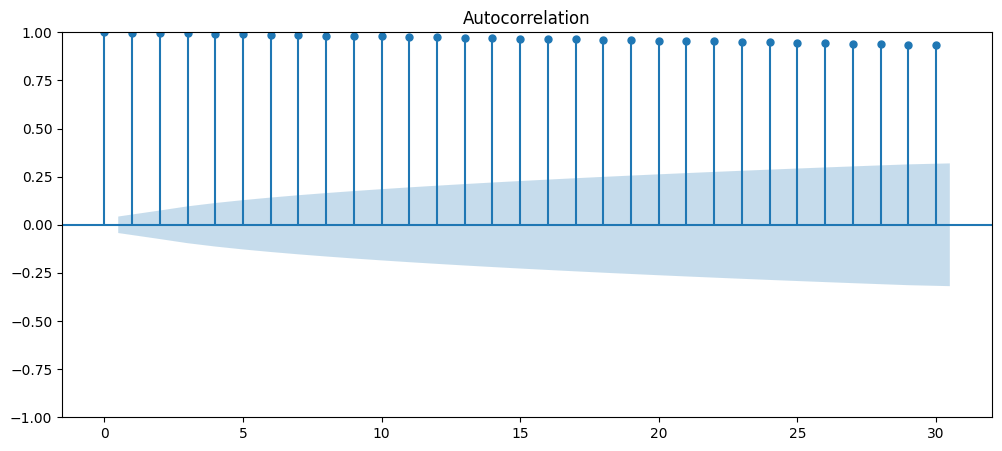

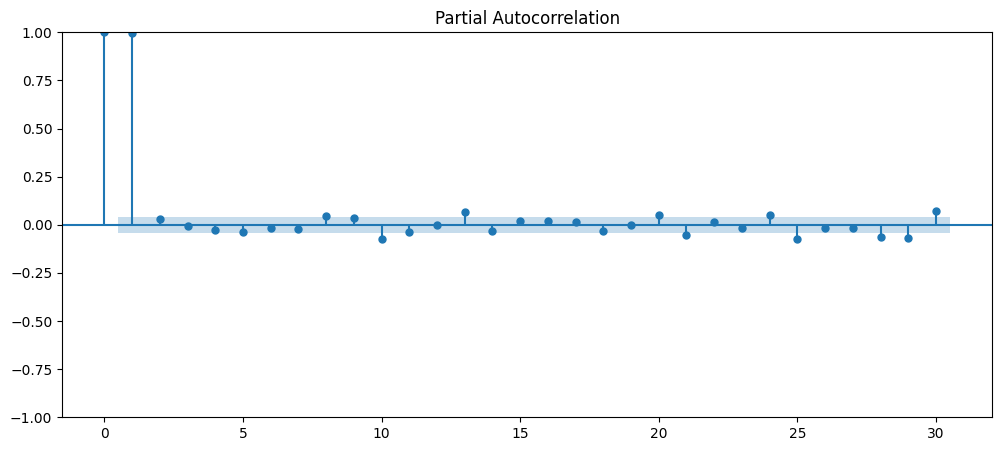

In [24]:
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(12,5))
sm.graphics.tsa.plot_acf(data['Close'], lags=30, ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12,5))
sm.graphics.tsa.plot_pacf(data['Close'], lags=30, ax=ax)
plt.show()

In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

class BitcoinPricePreprocessor:
    
    def __init__(self, df):
        self.df = df
        
    def count_missing_values(self):
        missing_values = self.df.isna().sum().sum()
        print(f'Number of missing values: {missing_values}')
        
    def fill_missing_values(self, method='ffill'):
        self.df.fillna(method=method, inplace=True)
        
    def normalize_data(self, scaler):
        self.df[['Open', 'High', 'Low', 'Close',' Volume BTC','	Volume USDT']] = scaler.fit_transform(self.df[['Open', 'High', 'Low', 'Close', 'Volume BTC','Volume USDT']])

    def denormalize(self, normalized_values):
        return self.scaler.inverse_transform(normalized_values.reshape(-1,1)).flatten()
        
    def preprocess_data(self):
        self.count_missing_values()
        self.fill_missing_values()
        self.normalize_data()
    
    def split_train_test(self, test_size=0.2):
        split_index = int((1-test_size) * len(self.df))
        train = self.df.iloc[:split_index].copy()
        test = self.df.iloc[split_index:].copy()
        return train, test



In [26]:
scaler = MinMaxScaler()

In [27]:
preprocessor = BitcoinPricePreprocessor(data)
preprocessor.count_missing_values()
preprocessor.fill_missing_values()
preprocessor.normalize_data(scaler)
train, test = preprocessor.split_train_test()

Number of missing values: 0


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

class BitcoinDataAnalyzer:
    
    def __init__(self, df):
        self.df = df
    
    def test_stationarity(self):
        # Проверка на стационарность ряда с помощью теста Дики-Фуллера
        result = sm.tsa.stattools.adfuller(self.df['Close'])
        print('Тест Дики-Фуллера:')
        print('ADF статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))
        print('Критические значения:')
        for key, value in result[4].items():
            print('\t{}: {}'.format(key, value))
    
    def kendall_test(self):
        # Проверка на наличие тренда с помощью теста Манна-Кендалла
        result = stats.mstats.kendalltau(self.df['Close'], np.arange(len(self.df)))
        print('Тест Манна-Кендалла:')
        print('Значение статистики: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))

    
    def sen_estimator(self):
        # Оценка наклона тренда с помощью оценки Тейла-Сена
        x = np.arange(len(self.df))
        slope, intercept, lo_slope, up_slope = stats.theilslopes(self.df['Close'], x, alpha=0.05)
        print('Оценка Тейла-Сена:')
        print('Наклон: {}'.format(slope))
    
    def grubbs_test(self):
        # Проверка на наличие выбросов с помощью теста Граббса
        alpha = 0.05
        n = len(self.df)
        G_crit = stats.t.ppf(1 - alpha / (2 * n), n - 2)
        G_max = np.max(np.abs((self.df['Close'] - np.mean(self.df['Close'])) / np.std(self.df['Close'])))
        if G_max > G_crit:
            print('Тест Граббса:')
            print('Найден выброс: {}'.format(G_max))
        else:
            print('Тест Граббса:')
            print('Выбросы не найдены')
    
    def shapiro_wilk_test(self):
        # Проверка на нормальность распределения с помощью теста Шапиро-Уилка
        result = stats.shapiro(self.df['Close'])
        print('Тест Шапиро-Уилка:')
        print('Статистика: {}'.format(result[0]))
        print('p-value: {}'.format(result[1]))

In [29]:
analyzer = BitcoinDataAnalyzer(data)
analyzer.test_stationarity()
print('-'*70)
analyzer.kendall_test()
print('-'*70)
analyzer.sen_estimator()
print('-'*70)
analyzer.grubbs_test()
print('-'*70)
analyzer.shapiro_wilk_test()

Тест Дики-Фуллера:
ADF статистика: -1.5365529978454462
p-value: 0.5153578829047463
Критические значения:
	1%: -3.4335206767270354
	5%: -2.862940658476002
	10%: -2.5675156466298095
----------------------------------------------------------------------
Тест Манна-Кендалла:
Значение статистики: 0.5010663056352054
p-value: 2.6368556212884605e-258
----------------------------------------------------------------------
Оценка Тейла-Сена:
Наклон: 0.0001787098093240719
----------------------------------------------------------------------
Тест Граббса:
Выбросы не найдены
----------------------------------------------------------------------
Тест Шапиро-Уилка:
Статистика: 0.8344378471374512
p-value: 3.7274539151040134e-42


In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train['Close'],
 order=(1,1,1),
 seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

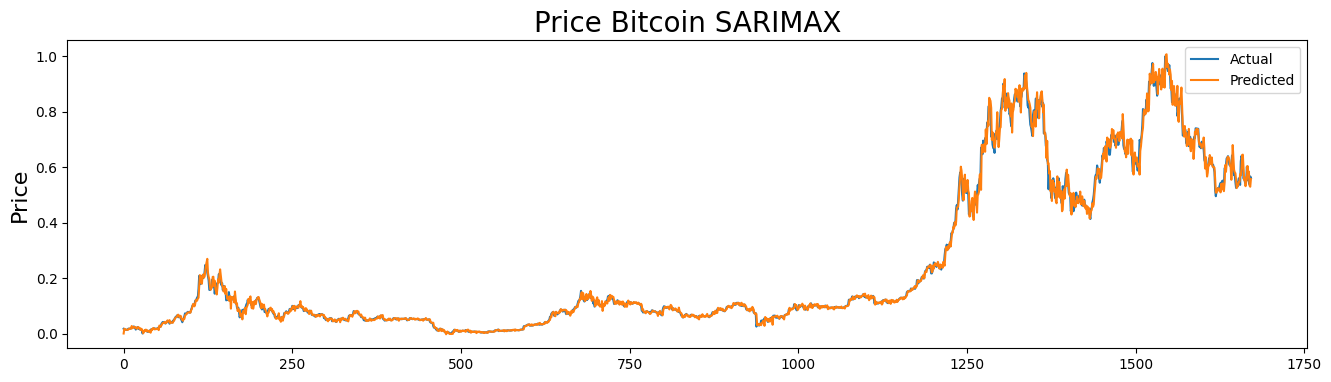

In [31]:
plt.figure(figsize=(16,4))
plt.plot(train['Close'], label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('Price Bitcoin SARIMAX', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.legend()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(train['Close'], predictions)
mae = mean_absolute_error(train['Close'], predictions)

print(f"MSE: {mse:.9f}")
print(f"MAE: {mae:.9f}")


MSE: 0.000359668
MAE: 0.010563083
